In [ ]:
Nicholas Chludzinski

In [ ]:
Zika Virus

In [9]:
# Codon table
codon_table = {
    "AAA": {"Letter": "K", "FullName": "Lysine"},
    "AAC": {"Letter": "N", "FullName": "Asparagine"},
    "AAG": {"Letter": "K", "FullName": "Lysine"},
    "AAT": {"Letter": "N", "FullName": "Asparagine"},
    "ACA": {"Letter": "T", "FullName": "Threonine"},
    "ACC": {"Letter": "T", "FullName": "Threonine"},
    "ACG": {"Letter": "T", "FullName": "Threonine"},
    "ACT": {"Letter": "T", "FullName": "Threonine"},
    "AGA": {"Letter": "R", "FullName": "Arginine"},
    "AGC": {"Letter": "S", "FullName": "Serine"},
    "AGG": {"Letter": "R", "FullName": "Arginine"},
    "AGT": {"Letter": "S", "FullName": "Serine"},
    "ATA": {"Letter": "I", "FullName": "Isoleucine"},
    "ATC": {"Letter": "I", "FullName": "Isoleucine"},
    "ATG": {"Letter": "M", "FullName": "Methionine"},
    "ATT": {"Letter": "I", "FullName": "Isoleucine"},
    "CAA": {"Letter": "Q", "FullName": "Glutamine"},
    "CAC": {"Letter": "H", "FullName": "Histidine"},
    "CAG": {"Letter": "Q", "FullName": "Glutamine"},
    "CAT": {"Letter": "H", "FullName": "Histidine"},
    "CCA": {"Letter": "P", "FullName": "Proline"},
    "CCC": {"Letter": "P", "FullName": "Proline"},
    "CCG": {"Letter": "P", "FullName": "Proline"},
    "CCT": {"Letter": "P", "FullName": "Proline"},
    "CGA": {"Letter": "R", "FullName": "Arginine"},
    "CGC": {"Letter": "R", "FullName": "Arginine"},
    "CGG": {"Letter": "R", "FullName": "Arginine"},
    "CGT": {"Letter": "R", "FullName": "Arginine"},
    "CTA": {"Letter": "L", "FullName": "Leucine"},
    "CTC": {"Letter": "L", "FullName": "Leucine"},
    "CTG": {"Letter": "L", "FullName": "Leucine"},
    "CTT": {"Letter": "L", "FullName": "Leucine"},
    "GAA": {"Letter": "E", "FullName": "Glutamic_acid"},
    "GAC": {"Letter": "D", "FullName": "Aspartic_acid"},
    "GAG": {"Letter": "E", "FullName": "Glutamic_acid"},
    "GAT": {"Letter": "D", "FullName": "Aspartic_acid"},
    "GCA": {"Letter": "A", "FullName": "Alanine"},
    "GCC": {"Letter": "A", "FullName": "Alanine"},
    "GCG": {"Letter": "A", "FullName": "Alanine"},
    "GCT": {"Letter": "A", "FullName": "Alanine"},
    "GGA": {"Letter": "G", "FullName": "Glycine"},
    "GGC": {"Letter": "G", "FullName": "Glycine"},
    "GGG": {"Letter": "G", "FullName": "Glycine"},
    "GGT": {"Letter": "G", "FullName": "Glycine"},
    "GTA": {"Letter": "V", "FullName": "Valine"},
    "GTC": {"Letter": "V", "FullName": "Valine"},
    "GTG": {"Letter": "V", "FullName": "Valine"},
    "GTT": {"Letter": "V", "FullName": "Valine"},
    "TAA": {"Letter": "O", "FullName": "Stop"},
    "TAC": {"Letter": "Y", "FullName": "Tyrosine"},
    "TAG": {"Letter": "O", "FullName": "Stop"},
    "TAT": {"Letter": "Y", "FullName": "Tyrosine"},
    "TCA": {"Letter": "S", "FullName": "Serine"},
    "TCC": {"Letter": "S", "FullName": "Serine"},
    "TCG": {"Letter": "S", "FullName": "Serine"},
    "TCT": {"Letter": "S", "FullName": "Serine"},
    "TGA": {"Letter": "O", "FullName": "Stop"},
    "TGC": {"Letter": "C", "FullName": "Cysteine"},
    "TGG": {"Letter": "W", "FullName": "Tryptophan"},
    "TGT": {"Letter": "C", "FullName": "Cysteine"},
    "TTA": {"Letter": "L", "FullName": "Leucine"},
    "TTC": {"Letter": "F", "FullName": "Phenylalanine"},
    "TTG": {"Letter": "L", "FullName": "Leucine"},
    "TTT": {"Letter": "F", "FullName": "Phenylalanine"},
}

In [11]:
import matplotlib.pyplot as plt

# DNA to amino acid
def dna_to_AA(dna_sequence):
    protein_sequence = []
    for i in range(0, len(dna_sequence), 3):
        codon = dna_sequence[i:i+3]
        if codon in codon_table:
            protein_sequence.append(codon_table[codon]["FullName"])
        else:
            # Unknown codon represented as "Unknown"
            protein_sequence.append("Unknown")  
    return protein_sequence

# Count the amino acids
def count_amino_acids(protein_sequence):
    amino_acid_count = {}
    for amino_acid in protein_sequence:
        if amino_acid in amino_acid_count:
            amino_acid_count[amino_acid] += 1
        else:
            amino_acid_count[amino_acid] = 1
    return amino_acid_count

# Read in the file
def read_fasta_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        current_sequence = ''
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if current_sequence:
                    sequences.append(current_sequence)
                current_sequence = ''
            else:
                current_sequence += line.upper()
        if current_sequence:
            sequences.append(current_sequence)
    return sequences

# Input file
input_fasta_file = '/Users/nicho/Downloads/full-zika.fasta' 

# Read DNA sequences from FASTA file
dna_sequences = read_fasta_file(input_fasta_file)

# Translate each DNA sequence to protein sequence and count amino acids
protein_sequences = []
for dna_seq in dna_sequences:
    protein_seq = dna_to_AA(dna_seq)
    protein_sequences.append(protein_seq)

# Calculate total counts of each amino acid across all protein sequences
total_amino_acid_counts = {}
for protein_seq in protein_sequences:
    amino_acid_counts = count_amino_acids(protein_seq)
    for amino_acid, count in amino_acid_counts.items():
        if amino_acid in total_amino_acid_counts:
            total_amino_acid_counts[amino_acid] += count
        else:
            total_amino_acid_counts[amino_acid] = count

# Sort amino acids by their full names for consistent plotting order
sorted_amino_acids = sorted(total_amino_acid_counts.items(), key=lambda x: x[0])

# Extract amino acid names and counts for plotting
amino_acids = [aa[0] for aa in sorted_amino_acids]
counts = [aa[1] for aa in sorted_amino_acids]


# Translate each DNA sequence to protein sequence and display
for i, dna_seq in enumerate(dna_sequences, start=1):
    protein_seq = dna_to_AA(dna_seq)
    for amino_acid in protein_seq:
        print(amino_acid)

Serine
Cysteine
Stop
Serine
Valine
Stop
Isoleucine
Arginine
Leucine
Arginine
Glutamine
Phenylalanine
Glutamic_acid
Phenylalanine
Glutamic_acid
Alanine
Lysine
Alanine
Serine
Asparagine
Serine
Isoleucine
Asparagine
Arginine
Phenylalanine
Tyrosine
Phenylalanine
Glycine
Phenylalanine
Glycine
Asparagine
Glutamic_acid
Serine
Phenylalanine
Tryptophan
Serine
Stop
Lysine
Threonine
Glutamine
Lysine
Arginine
Asparagine
Proline
Glutamic_acid
Aspartic_acid
Serine
Glycine
Leucine
Serine
Isoleucine
Cysteine
Stop
Asparagine
Alanine
Glutamic_acid
Stop
Proline
Valine
Stop
Alanine
Proline
Leucine
Glycine
Alanine
Stop
Arginine
Glycine
Cysteine
Glutamine
Proline
Aspartic_acid
Phenylalanine
Cysteine
Tryptophan
Valine
Methionine
Glycine
Proline
Serine
Glycine
Tryptophan
Serine
Tryptophan
Glutamine
Phenylalanine
Stop
Proline
Phenylalanine
Stop
Aspartic_acid
Serine
Arginine
Glutamine
Serine
Serine
Histidine
Histidine
Tryptophan
Valine
Serine
Serine
Isoleucine
Aspartic_acid
Glycine
Valine
Glutamine
Tryptophan
G

In [13]:
# Translate each DNA sequence to protein sequence and count amino acids
for i, dna_seq in enumerate(dna_sequences, start=1):
    protein_seq = dna_to_AA(dna_seq)
    amino_acid_counts = count_amino_acids(protein_seq)
    print(f"Protein Sequence Zika:\n")
    for amino_acid, count in amino_acid_counts.items():
        print(f"{amino_acid}: {count}")
    print()

Protein Sequence Zika:

Serine: 331
Cysteine: 136
Stop: 215
Valine: 121
Isoleucine: 89
Arginine: 285
Leucine: 335
Glutamine: 197
Phenylalanine: 70
Glutamic_acid: 168
Alanine: 170
Lysine: 192
Asparagine: 55
Tyrosine: 35
Glycine: 270
Tryptophan: 178
Threonine: 259
Proline: 240
Aspartic_acid: 73
Methionine: 90
Histidine: 93
Unknown: 1



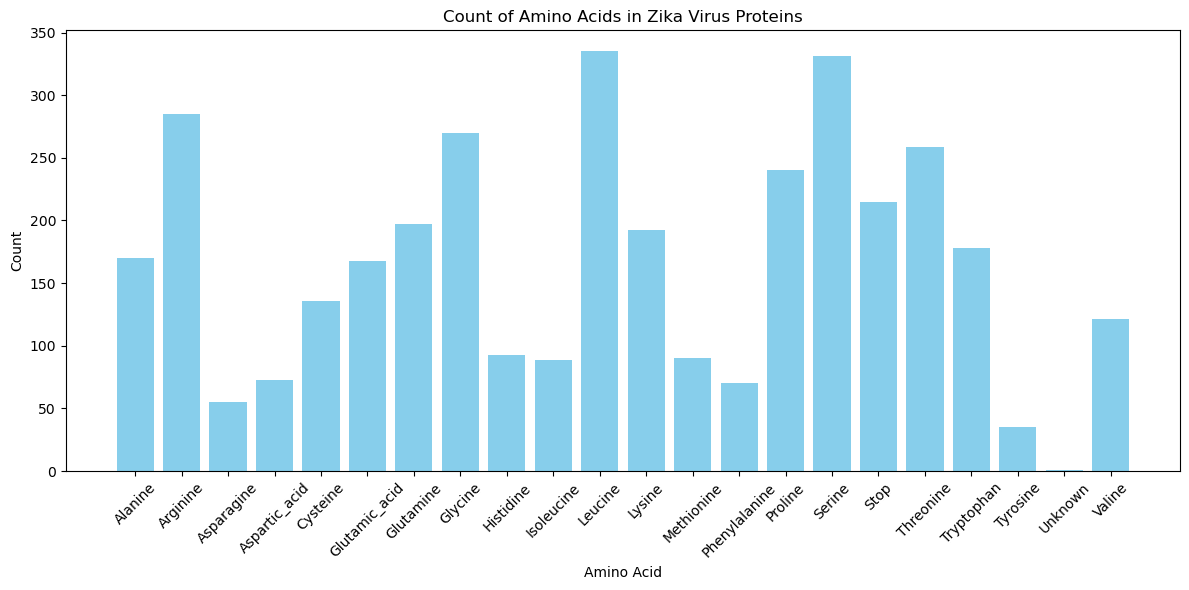

In [15]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(amino_acids, counts, color='skyblue')
plt.xlabel('Amino Acid')
plt.ylabel('Count')
plt.title('Count of Amino Acids in Zika Virus Proteins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()